In [1]:
#Load important libraries
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

In [2]:
#Load in all match events 
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/8658.json')
events = events.json()

#Transform JSON into a dataframe 
df = json_normalize(events, sep = "_")

In [3]:
# Excluding (...) for large number of columns
pd.set_option("display.max.columns", None)

df.head(8)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
0,47638847-fd43-4656-b49c-cff64e5cfc0a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,771,France,1,Regular Play,771,France,442.0,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c04305d-5615-4520-9be5-7c232829954b,2,1,00:00:00.000,0,0,1,1.412,35,Starting XI,771,France,1,Regular Play,785,Croatia,433.0,"[{'player': {'id': 3444, 'name': 'Danijel Suba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c5e17439-efe2-480b-9cff-1600998674d7,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,771,France,1,Regular Play,771,France,NaN,NaN,[7e1460eb-c572-4059-8cd4-cec4857f818d],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7e1460eb-c572-4059-8cd4-cec4857f818d,4,1,00:00:00.000,0,0,1,0.000,18,Half Start,771,France,1,Regular Play,785,Croatia,NaN,NaN,[c5e17439-efe2-480b-9cff-1600998674d7],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,918ffaaf-3cee-41e5-87e2-4bcc8d43a859,5,1,00:00:00.400,0,0,2,1.159,30,Pass,785,Croatia,9,From Kick Off,785,Croatia,NaN,NaN,[329cb470-9b7a-4b19-b8d2-50fa902295af],"[61.0, 41.0]",5472.0,M

In [4]:
#Filtering shots made by France

france_shots = df.loc[(df['type_name'] == 'Shot') & (df['team_name'] == "France")]

In [5]:
#Let's look what we got

france_shots

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
1052,ad19fde7-da37-4430-b1a3-2293ae7c4fff,1053,1,00:37:56.787,37,56,73,0.533,16,Shot,771,France,5,Other,771,France,NaN,NaN,[826b19b4-3677-4476-bbd3-fededea1d302],"[108.0, 40.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760000,"[120.0, 37.6, 0.1]",NaN,93.0,Normal,88.0,Penalty,97.0,Goal,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404,474afda2-d8c7-4254-93bf-895d9c440ccf,1405,2,00:01:10.027,46,10,95,1.653,16,Shot,771,France,8,From Keeper,771,France,NaN,NaN,[a7d5f212-baf8-4257-91a2-ad66d50a4ebe],"[95.0, 45.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028645,"[119.0, 38.9, 0.5]",3fc7f963-3898-41a2-8c66-6134488a6ab0,93.0,Normal,87.0,Open Play,100.0,Saved,38.0,Left Foot,"[{'location': [98.0, 45.0], 'player': {'id': 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647,cc69d1e5-36bf-4522-ae6d-fa1459dfb877,1648,2,00:06:35.947,51,35,107,0.280,16,Shot,771,France,1,Regular Play,771,France,NaN,NaN,[103cc7b6-f2e5-4648-a1d5-202973049731],"[115.0, 55.0]",3009.0,Kylian Mbappé Lottin,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098792,"[118.0, 39.9, 0.6]",0deaee58-85a1-43f7-9cdf-2caadd3edc2b,93.0,Normal,87.0,Open Play,100.0,Saved,40.0,Right Foot,"[{'location': [117.0, 52.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,73b228b2-3719-4d37-93ba-fe167cce9ebd,1859,2,00:13:32.347,58,32,120,0.773,16,Shot,771,France,4,From Throw In,771,France,NaN,NaN,"[13ed6cdc-6e1a-42fc-8624-d69372b94272, 8923239...","[99.0, 41.0]",20004.0,Paul Pogba,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Text(0.5, 1.0, 'France Shots')

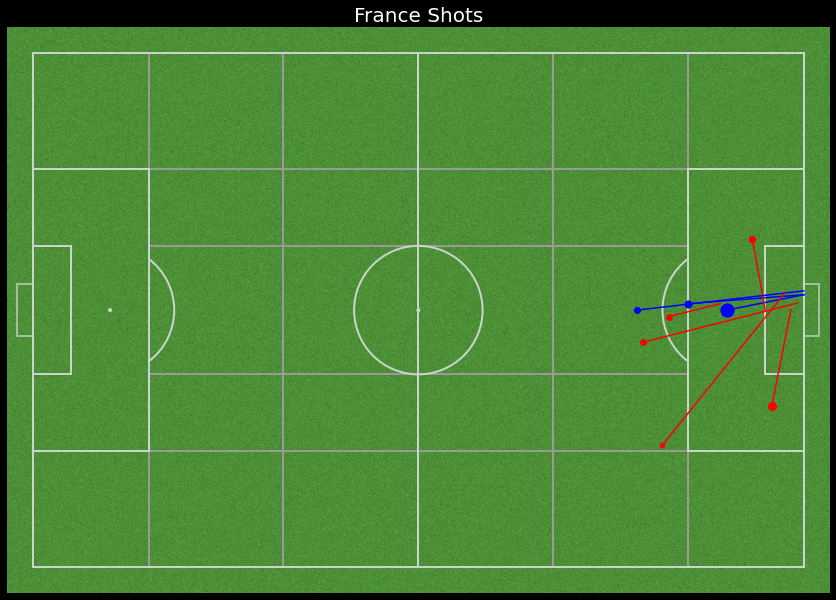

In [6]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box',
              constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(france_shots['id'])):
    #We can choose period 1, 2 or both
    if france_shots['period'].iloc[x] == 1 or france_shots['period'].iloc[x] == 2:
        # Size of scatter will depend on xG
        size = np.sqrt(france_shots['shot_statsbomb_xg'].iloc[x])*200
        if france_shots['shot_outcome_name'].iloc[x] == 'Goal':
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            
            plt.plot((france_shots['location'].iloc[x][0],france_shots['shot_end_location'].iloc[x][0]),\
                     (france_shots['location'].iloc[x][1],france_shots['shot_end_location'].iloc[x][1]),color='blue')
            plt.scatter(france_shots['location'].iloc[x][0],france_shots['location'].iloc[x][1],s=size,color='blue')
        else:
            plt.plot((france_shots['location'].iloc[x][0],france_shots['shot_end_location'].iloc[x][0]),\
                     (france_shots['location'].iloc[x][1],france_shots['shot_end_location'].iloc[x][1]),color='red')
            plt.scatter(france_shots['location'].iloc[x][0],france_shots['location'].iloc[x][1],s=size,color='red')
    
plt.title('France Shots',color='white',size=20)

In [7]:
#Filtering shots made by France

croatia_shots = df.loc[(df['type_name'] == 'Shot') & (df['team_name'] == "Croatia")]

croatia_shots

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
723,cfdb23f5-0247-4f10-9641-8ac06824722f,724,1,00:20:51.227,20,51,43,1.013,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[d8e239af-b66d-475c-a719-b46c418d8a49],"[112.0, 49.0]",5468.0,Domagoj Vida,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041081,"[119.0, 36.6, 5.0]",f66011e2-0cbf-46b9-b845-4d759c0c34ae,93.0,Normal,87.0,Open Play,98.0,Off T,37.0,Head,"[{'location': [120.0, 42.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,2776f49c-73a8-4185-bcce-9cbef244cf3c,793,1,00:23:34.907,23,34,49,2.053,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[c0201b3a-c444-4179-a42a-324d928d7a38],"[108.0, 29.0]",5470.0,Ivan Rakitić,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066235,"[120.0, 47.5, 6.4]",efc066fd-75c1-4744-b7fc-070cf6c8c293,95.0,Volley,87.0,Open Play,98.0,Off T,38.0,Left Foot,"[{'location': [120.0, 40.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,dd524196-386d-4759-b40b-e920cc77b059,911,1,00:27:53.880,27,53,58,0.587,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[c0291f7e-a0c0-43c9-8bd3-a60120fdc946],"[105.0, 32.0]",5474.0,Ivan Perišić,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063829,"[120.0, 43.6, 0.8]",239d4230-e8d1-4e17-b9dd-b7f57faf3ecb,91.0,Half Volley,87.0,Open Play,97.0,Goal,38.0,Left Foot,"[{'location': [120.0, 40.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,b99d698f-5891-402b-b5cf-33ca81e1554f,1077,1,00:39:25.267,39,25,74,1.000,16,Shot,785,Croatia,1,Regular Play,785,Croatia,NaN,NaN,[b365fe25-80c3-481c-81cb-c7de657e9d61],"[108.0, 41.0]",5465.0,Ante Rebić,17.0,Right Wing,

Text(0.5, 1.0, 'Croatia Shots')

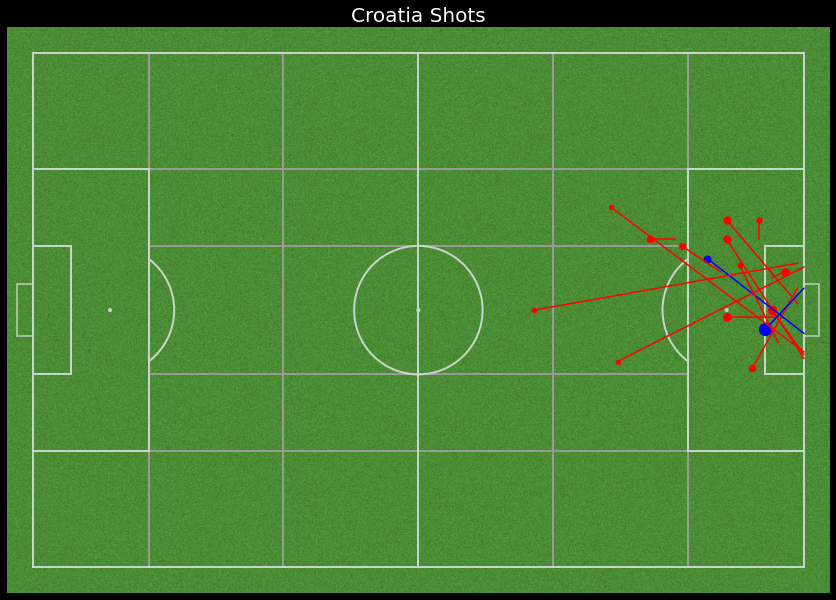

In [8]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box',
              constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(croatia_shots['id'])):
    #We can choose period 1, 2 or both
    if croatia_shots['period'].iloc[x] == 1 or croatia_shots['period'].iloc[x] == 2:
        # Size of scatter will depend on xG
        size = np.sqrt(croatia_shots['shot_statsbomb_xg'].iloc[x])*200
        if croatia_shots['shot_outcome_name'].iloc[x] == 'Goal':
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            plt.plot((croatia_shots['location'].iloc[x][0],croatia_shots['shot_end_location'].iloc[x][0]),\
                     (croatia_shots['location'].iloc[x][1],croatia_shots['shot_end_location'].iloc[x][1]),color='blue')
            plt.scatter(croatia_shots['location'].iloc[x][0],croatia_shots['location'].iloc[x][1],s=size,color='blue')
        else:
            plt.plot((croatia_shots['location'].iloc[x][0],croatia_shots['shot_end_location'].iloc[x][0]),\
                     (croatia_shots['location'].iloc[x][1],croatia_shots['shot_end_location'].iloc[x][1]),color='red')
            plt.scatter(croatia_shots['location'].iloc[x][0],croatia_shots['location'].iloc[x][1],s=size,color='red')
    
plt.title('Croatia Shots',color='white',size=20)

In [9]:
shots = df.loc[(df['type_name'] == 'Shot')]
goals = shots.loc[shots['shot_outcome_name'] == 'Goal']

In [10]:
goals

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
910,dd524196-386d-4759-b40b-e920cc77b059,911,1,00:27:53.880,27,53,58,0.587,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[c0291f7e-a0c0-43c9-8bd3-a60120fdc946],"[105.0, 32.0]",5474.0,Ivan Perišić,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063829,"[120.0, 43.6, 0.8]",239d4230-e8d1-4e17-b9dd-b7f57faf3ecb,91.0,Half Volley,87.0,Open Play,97.0,Goal,38.0,Left Foot,"[{'location': [120.0, 40.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052,ad19fde7-da37-4430-b1a3-2293ae7c4fff,1053,1,00:37:56.787,37,56,73,0.533,16,Shot,771,France,5,Other,771,France,NaN,NaN,[826b19b4-3677-4476-bbd3-fededea1d302],"[108.0, 40.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760000,"[120.0, 37.6, 0.1]",NaN,93.0,Normal,88.0,Penalty,97.0,Goal,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1862,1ff32d30-cf80-4775-997f-0841694c6069,1863,2,00:13:33.907,58,33,120,1.053,16,Shot,771,France,4,From Throw In,771,France,NaN,NaN,[81662547-2624-4359-bd04-503deaf11ffa],"[102.0, 39.0]",20004.0,Paul Pogba,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061371,"[120.0, 37.6, 1.0]",NaN,93.0,Normal,87.0,Open Play,97.0,Goal,38.0,Left Foot,"[{'location': [105.0, 45.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,a8692197-bb35-453d-9191-fe7daa25f8df,2060,2,00:19:36.707,64,36,128,0.933,16,Shot,771,France,1,Regular Play,771,France,NaN,NaN,[e963fbd5-e52d-40a7-bef0-02edd6de28b5],"[94.0, 40.0]",3009.0,Kylian Mbappé Lottin,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Text(0.5, 1.0, 'France Shots (to the right) and Croatia Shots (to the left)')

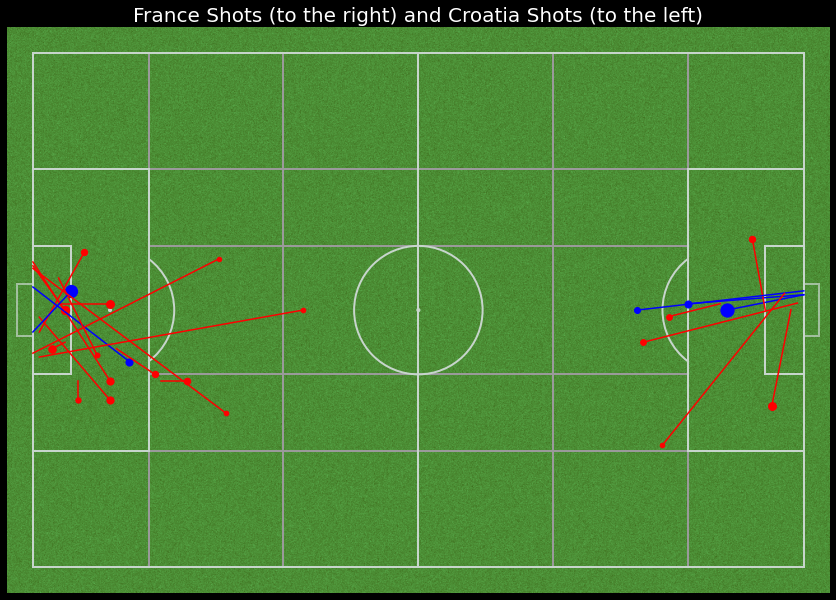

In [11]:
# Let's combine these 2 shot maps in one pitch

fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box',
              constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(france_shots['id'])):
    #We can choose period 1, 2 or both
    if france_shots['period'].iloc[x] == 1 or france_shots['period'].iloc[x] == 2:
        # Size of scatter will depend on xG
        size = np.sqrt(france_shots['shot_statsbomb_xg'].iloc[x])*200
        if france_shots['shot_outcome_name'].iloc[x] == 'Goal':
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            
            plt.plot((france_shots['location'].iloc[x][0],france_shots['shot_end_location'].iloc[x][0]),\
                     (france_shots['location'].iloc[x][1],france_shots['shot_end_location'].iloc[x][1]),color='blue')
            plt.scatter(france_shots['location'].iloc[x][0],france_shots['location'].iloc[x][1],s=size,color='blue')
        else:
            plt.plot((france_shots['location'].iloc[x][0],france_shots['shot_end_location'].iloc[x][0]),\
                     (france_shots['location'].iloc[x][1],france_shots['shot_end_location'].iloc[x][1]),color='red')
            plt.scatter(france_shots['location'].iloc[x][0],france_shots['location'].iloc[x][1],s=size,color='red')
    
plt.title('France Shots',color='white',size=20)

#for x in range(15):

for x in range(len(croatia_shots['id'])):
    #We can choose period 1, 2 or both
    if croatia_shots['period'].iloc[x] == 1 or croatia_shots['period'].iloc[x] == 2:
        # Size of scatter will depend on xG
        size = np.sqrt(croatia_shots['shot_statsbomb_xg'].iloc[x])*200
        if croatia_shots['shot_outcome_name'].iloc[x] == 'Goal':
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            # In order to visualize 2nd team in different half of the pitch,
            # we'll deduct the locations from 120 (x) and 80 (y) to invert them
            plt.plot((120-croatia_shots['location'].iloc[x][0],120-croatia_shots['shot_end_location'].iloc[x][0]),\
                     (80-croatia_shots['location'].iloc[x][1],80-croatia_shots['shot_end_location'].iloc[x][1]),color='blue')
            plt.scatter(120-croatia_shots['location'].iloc[x][0],80-croatia_shots['location'].iloc[x][1],s=size,color='blue')
        else:
            plt.plot((120-croatia_shots['location'].iloc[x][0],120-croatia_shots['shot_end_location'].iloc[x][0]),\
                     (80-croatia_shots['location'].iloc[x][1],80-croatia_shots['shot_end_location'].iloc[x][1]),color='red')
            plt.scatter(120-croatia_shots['location'].iloc[x][0],80-croatia_shots['location'].iloc[x][1],s=size,color='red')
    
plt.title('France Shots (to the right) and Croatia Shots (to the left)',color='white',size=20)